## SASによる統計解析

ここでは、SASにおける様々な基本的な統計検定の実行方法について説明します。

* 比率検定
* カイ二乗検定
* フィッシャーの正確確率検定
* 相関係数
* t検定/順位和検定
* 一元配置分散分析 (ANOVA)/Kruskal-Wallis検定
* 線形回帰分析
* ロジスティック回帰分析
* ポアソン回帰分析

注: このコースでは、これらの検定の統計理論や「公式」については詳しく説明しません。 オンラインには、これらの検定について詳しく解説されているものがたくさんあるので、ここで扱っていない分野を勉強したい場合はそちらを参照してください。ここでは、検定に適合するコードを書くことだけが必要とされ、結果の解釈は求められません。


## 比率検定
１標本の比率検定を行うには、PROC FREQ を使用できます。この検定を行うには、TABLES ステートメントで BINOMIAL オプションを使用します。BINOMIAL オプションには以下のようなものを指定できます。

* p= - 仮説検定の帰無仮説値
* level= - "成功" とみなすグループを指定
* CORRECT - 連続性補正を使用して p 値を計算します (標本サイズが小さい場合に有用)
* CL= - Wald、EXACT、LOGIT などの異なるタイプの信頼区間を選択できます。

### 例

以下の例では、"successes" のカウントと "failures" のカウントを持つ集計データセットを使用しています。ここでは、喫煙者の比率に興味があるので、喫煙者数と非喫煙者数をカウントしています。


<!-- 
# Statistical Analysis in SAS

Now we are going to cover how to perform a variety of basic statistical tests in SAS.

* Proportion tests
* Chi-squared
* Fisher’s Exact Test
* Correlation
* T-tests/Rank-sum tests
* One-way ANOVA/Kruskal-Wallis
* Linear Regression
* Logistic Regression
* Poisson Regression

Note: We will be glossing over the statistical theory and “formulas” for these tests. There are plenty of resources online for learning more about these tests if you have not had a course covering this material. You will only be required to write code to fit or perform these test but will not be expected to interpret the results for this course.

## Proportion Tests

To conduct a test for one proportion, we can use PROC FREQ. To get this test, we use the BINOMIAL option in the TABLES statement. As options to BINOMIAL, we can specify

* p= - the null value for the hypothesis test
* level= - which group to use as a "success"
* CORRECT - uses a continuity correction for calculating the p-value (can be useful for small sample sizes)
* CL= - can select different types of CI such as WALD, EXACT, and LOGIT.

### Example

In the following example, we use a summarized dataset, where we have the counts of the "successes" and "failures". In this case, we are interested in the proportion of smokers, so we have a count of smokers and a count of non-smokers.  
-->

In [1]:
data smoke;
  input smkstatus $ count;
  datalines;
Y 15
N 17
;
run;

proc freq data = smoke;
  tables smkstatus / binomial(p = 0.5 level = "Y" correct) alpha = 0.05;
  weight count;
run;

WEIGHT ステートメントを使用して Y と N のカウントを指定することに注意してください。このステートメントがない場合、 Y が 1、N が 1 オブザベーションと読み込んでしまいます。  
推定比率は 0.4688 です。(漸近)95%信頼区間は (0.2802, 0.6573) であり、両側 (連続性補正) p 値は、$H_0: p=0.5$ vs $H_a: p\neq 0.5$ を検定するもので、0.8597 です。  
あるいは、以下のように、個々のデータが列挙されている形でも構いません。  


<!-- 
Note the use of the WEIGHT statement to specify the counts for Y and N. Without this statement SAS would read our data as having 1 Y and 1 N.  
The estimated proportion is 0.4688. The (asymptotic) 95% CI is (0.2802, 0.6573) and the two sided (continuity corrected) p-value for testing $H_0: p=0.5$ vs $H_a: p\neq 0.5$ is 0.8597.  
Alternatively, we could have had the data listed out for each individual as follows.  
-->

In [2]:
data smoke2;
  do i = 1 to 15;
    smkstatus = "Y";
    output;
  end;
  do i = 1 to 17;
    smkstatus = "N";
    output;
  end;
  drop i;
run;

proc freq data = smoke2;
  tables smkstatus / binomial(p = 0.5 level = "Y" correct) alpha = 0.05;
run;

## カイ二乗検定

2 つのカテゴリ変数間の関連を検定するには、カイ二乗独立性検定を行うことができます。ここでも、PROC FREQ を使用して tables ステートメントを実行します。2x2 の表の場合は、カイ二乗検定が自動的に実行されますが、より大きな 表の場合は、tables ステートメントに CHISQ オプションを指定することで出力することができます。また、有用なオプションとして、帰無仮説である独立性の下での期待されるセルカウントを提供する EXPECTED オプションもあります。これらの期待されるセルカウントは、カイ二乗検定が適切かどうかを判断するために必要です。

### 例

次の例では、Kaggle の中古車オークションのデータセットを使用して、オンラインでの販売と損をしているかどうかの関連を検定しています。

<!-- 
## Chi-squared Test

To test for an association between two categorical variables, we could perform a chi-square test of independence. Again, we will use PROC FREQ with a tables statement. For 2x2 tables, a chi-square test is automatically performed, but for larger tables, we can request is by providing the CHISQ option to the tables statement. Another useful option to also specify is the EXPECTED option which provided the expected cell counts under the null hypothesis of independence. These expected cell counts are needed to assess whether or not the chi-square test is appropriate.

### Example

The following example uses the Kaggle car auction dataset to test for an association between online sales and a car being a bad buy.  
-->

In [3]:
filename cardata '/folders/myfolders/SAS_Notes/data/kaggleCarAuction.csv';

proc import datafile = cardata out = cars dbms = csv replace;
  getnames = yes;
  guessingrows = 1000;
run;

proc freq data = cars;
  tables isbadbuy*isonlinesale / chisq expected;
run;

カイ二乗検定の結果、p 値は 0.3178 です。連続性補正付きのカイ二乗検定を使用すると、p 値は 0.3356 になります。

2x2 の場合、この例のように、リスク差、相対リスク、オッズ比などの効果量を求めることもできます。これらは、RISKDIFF、RELRISK、OR オプションを使用すると、信頼区間とともに 3 つすべてを求めることができます。


<!-- 
The chi-square test results in a p-value of 0.3178, or if we use the chi-square test with continuity correction, then we get a p-value of 0.3356.  
In the 2x2 case, as in this example, we may also want measures of effert such as the risk difference, relative risk and odds ratio. We can obtain these using the RISKDIFF, RELRISK, and OR options which will request all three measures with confidence intervals.  
-->

In [4]:
proc freq data = cars;
  tables isbadbuy*isonlinesale / riskdiff relrisk or;
run;

リスク差については、2 つの表が出力されます。1 つ目の表は、第 1 列の条件付き行比率と第 2 列の条件付き行比率を比較したものです。同様に、相対リスクについては、第 1 列と第 2 列の相対リスクが得られます。これにより、目的のアウトカムに対応する列を選択することができます。

<!-- 
For the risk difference, SAS provides two tables that compare the conditional row proportions in the first column and the conditional row proportions in the second column. Similarly, for the relative risk, we get a relative risk for the first and the second column. This allows us to pick the one that matters to us depending on which column corresponds to the outcome of interest.  
-->

## フィッシャーの正確確率検定

2 つのカテゴリ変数間の関連を検定する別の方法として、フィッシャーの正確確率検定があります。この検定は、ランダムサンプリング以外には何の仮定も置かないノンパラメトリック検定です。ただし、注意しなければならないのは、変数の水準の数と観察回数が増えるにつれて、検定の実行に必要な計算時間が長くなることです。2x2 表の場合ではこの検定の実行時間は非常に短いですが、5x5表の場合は、データ量や使用するコンピュータによっては、完了までに数時間かかる場合もあります。

2x2 表の場合はこの検定が出力され、それより大きい表の場合はTableステートメントにFISHERオプションを使用すると検定を行うことができます。

### 例

次のプログラムは、フィッシャーの正確確率検定を使用して、車の購入が損であったかと、その車をオンラインで購入することの関連について検定します。

<!-- 
## Fisher's Exact Test

An alternative way to test for an association between two categorical variables is Fisher's exact test. This test is a nonparametric test that makes no assumption other than that we have a random sample. Note, however, that this comes with a price. The more levels our variables have and the more observations we have will increase the computing time needed to perform this test. For 2x2 tables, this test is usally very quick, but for 5x5 tables, depending on how much data and what computer you are using, this test may take hours to complete.

For 2x2 tables, this test is automatically output. For larger tables, if you want this test, then you will need to specify the FISHER option in the TABLES statement.

### Example

The following SAS program uses Fisher's exact test to test for an association between a car being a bad buy and buying the car online.  
-->

In [5]:
proc freq data = cars;
  tables isbadbuy*isonlinesale / fisher;
run;

フィッシャーの正確確率検定によるP値は0.3324です。

<!-- 
The p-value for Fisher's exact test is 0.3324.  
-->

## 相関分析

CORR プロシージャは、パラメトリックなピアソン相関係数とノンパラメトリックなスピアマン順位相関係数、および仮説検定の両方を実行して、相関分析を行うことができます。デフォルトの相関出力はピアソン相関係数です。スピアマン順位相関係数を要求するには、PROC CORR ステートメントに SPEARMAN オプションを追加します。

### 例

Charm City 循環バス乗車率データセットを使用して、PROC CORR を用いたいくつかの例を見てみましょう。次のプログラムは、オレンジラインとパープルラインのバス間の平均乗車人数の相関関係と仮説検定結果を出力します。

<!-- 
## Correlation

SAS's CORR procedure can perform correlation analysis by providing both the parametric Pearson's correlation and the nonparametric Spearman's rank correlation coefficients and hypothesis tests. The default correlation output is Pearson's. To request the Spearman's rank correlation, add the SPREAMAN option to the PROC CORR statement.

### Example

Let's look at some examples using PROC CORR using the Charm City Circulator bus ridership dataset. The following SAS program will find the Pearson correlation and hypothesis test results for the correlation between the average daily ridership between the orange and purple bus lines.  
-->

In [6]:
filename busdata '/folders/myfolders/SAS_Notes/data/Charm_City_Circulator_Ridership.csv';

proc import datafile = busdata out = circ dbms = csv replace;
  getnames = yes;
  guessingrows = 1000;
run;

proc corr data = circ;
  var orangeaverage purpleaverage;
run;

### 例

また、複数の変数の相関行列を一度に取得することもできます。次の例でも、相関係数を計算する際にペアワイズ完全ではなく完全なオブザベーションのみを使用するために、NOMISS オプションを使用しています。ここでは、オレンジ、パープル、バナー、グリーンの 4 つのバス路線間の平均乗車人数間の相関行列を算出します。


<!-- 
### Example

We can also get a correlation matrix for multiple variables at the same time. The following example also uses the NOMISS option to only use complete observations instead of pairwise complete observations when calculating the correlations. Here we get the correlation matrix between average ridership counts between all four of the orange, purple, banner, and green bus lines.  
-->

In [7]:
proc corr data = circ nomiss;
  var orangeAverage purpleAverage greenAverage bannerAverage;
run;

すべてのペアワイズ相関ではなく、特定のペアのみが必要な場合は、次の例のように WITH ステートメントを使用できます。


<!-- 
If we don't want all pairwise correlations, but instead only specific pairs, then we can use the WITH statement as in the following example.  
-->

In [8]:
proc corr data = circ nomiss;
  var orangeAverage purpleAverage;
  with greenAverage bannerAverage;
run;

ピアソン相関係数ではなくスピアマン順位相関係数を取得するには、PROC CORR ステートメントに SPEARMAN オプションを追加します。

### 例

次のプログラムは、オレンジラインとパープルラインの平均乗車人数間の相関係数が 0 であるという仮説検定に関連するスピアマン順位相関係数と p 値を出力します。


<!-- 
To get Spearman's rank correlation instead of Pearson's correlation, add the SPEARMAN option to the PROC CORR statement.

### Example

The following SAS program produces Spearman's rank correlation coefficient and associated p-value for the hypothesis test of the correlation is 0 between the average daily ridership counts betwen the orange and purple bus lines.  
-->

In [9]:
proc corr data = circ spearman;
  var orangeAverage purpleAverage;
run;

##  t検定

SASでは、TTEST プロシージャを使用して以下の t 検定を実行できます。

* 一標本 t 検定
* 対応のある標本 t 検定
* 二標本 t 検定

### 例

この例では、一標本 t 検定を使用して、オレンジラインの平均乗車人数が 3000 を超えているかどうかを検定します。

<!-- 
## T-Tests

T-tests can be performed in SAS with the TTEST procedure including

* one sample t-test
* paired t-test
* Two sample t-test

### Example

In this example, we will test if the average daily ridership on the orange bus line is greater than 3000 using a one sample t-test.  
-->


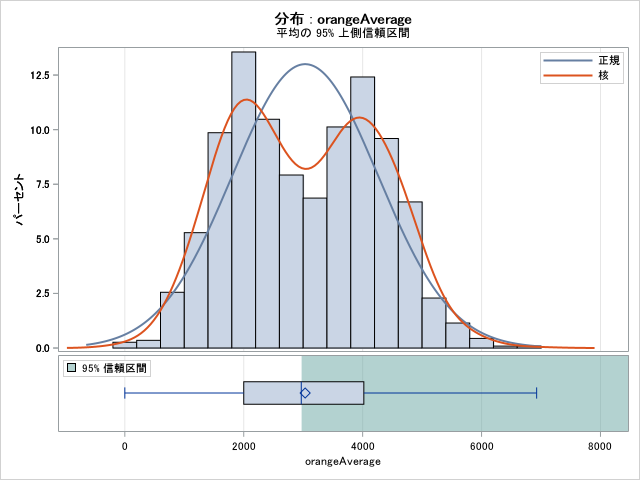
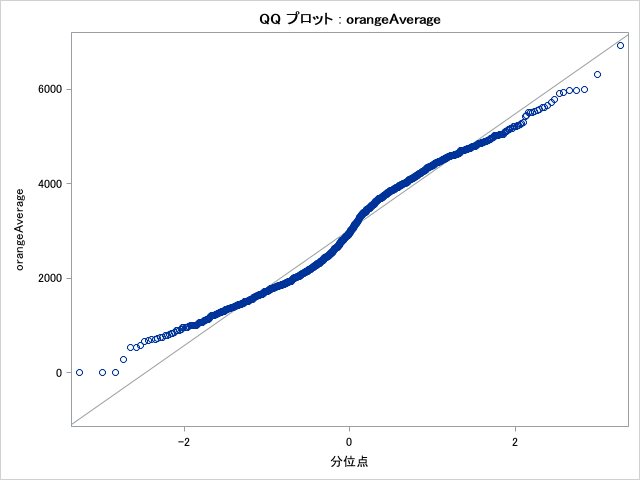

In [10]:
proc ttest data = circ h0 = 3000 side = u;
  var orangeAverage;
run;

H0= オプションは t 検定における帰無仮説の値を指定し、SIDE= オプションは片側 (L)、両側 (U)、または不等号 (2) の検定を行うかどうかを指定します。デフォルト値は、帰無仮説の値が 0、片側検定が 2 (両側) です。出力には、いくつかの要約統計量、検定の p 値、信頼区間、ヒストグラム、および QQ プロット (正規性の仮定を評価するため) が含まれています。

出力を見ると、p 値は 0.1814 であることがわかります。片側検定を要求したので、片側の信頼区間が得られます。通常の (両側) 信頼区間を得るには、両側検定を要求する必要があります。

<!-- 
The H0= option specifies the null value in the t-test and the SIDE= option specifies whether you want a less than (L), greater than (U), or not equal to (2) test. The default values are 0 for the null hypothesis value and two sided (2) for the alternative hypothesis. The output provides some summary statistics, the p-value for the test, confidence interval and a histogram and QQ plot to assess the normality assumption.  
From the output, we find the p-value to be 0.1814. Since we requested a one-side test, we get a one-sided confidence interval. To get our usual (two-sided) confidence interval, we need to request a two-sided test.  
-->

二標本 t 検定を行うには、データが 2 列の形式になっている必要があります。

* 両方のグループの定量データを含むデータ列
* グループを示すグループ変数列

PROC TTEST では、データ変数を VAR ステートメントに、グループ変数を CLASS ステートメントに指定して、二標本 t 検定を行います。

### 例

次のプログラムでは、オレンジラインとパープルラインの平均乗車人数間で二標本 t 検定を実行します。最初に、データを PROC TTEST に必要なデータ形式に変換する必要があります。

<!-- 
For a two sample t-test, we need to have the data formatted in two columns:

* A data column that contains the quantitative data for both groups
* A grouping variable column that indicates the group for the data value in that row.

In PROC TTEST, we put the data variable in the VAR statement and the grouping variable in the CLASS statement to get a two sample t-test.

### Example

In the following SAS program, we perform a two-sample t-test between the orange and purple bus lines' average ridership counts. We will first have to transform the data to meet the required data format for PROC TTEST.  
-->


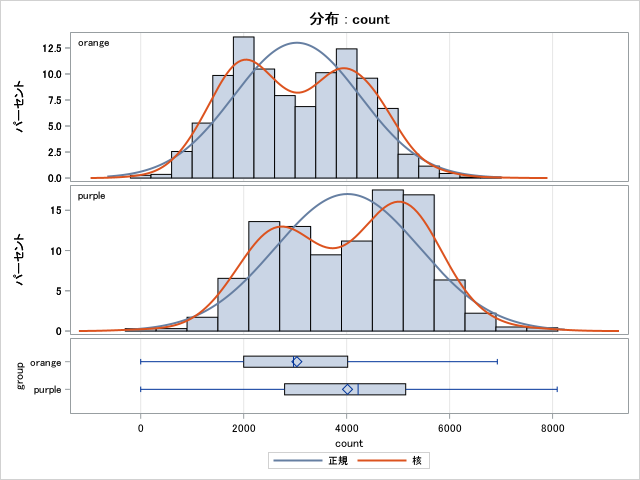
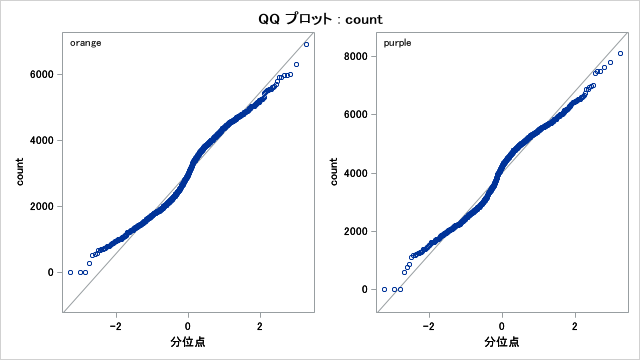

In [11]:
data circ_sub;
  set circ;
  count = orangeaverage;
  group = "orange";
  output;
  count = purpleaverage;
  group = "purple";
  output;
  keep count group;
run;

proc ttest data = circ_sub;
  var count;
  class group;
run;

出力には、各グループの要約統計量、各グループ平均の信頼区間、2 つの平均の差の信頼区間、2 つの平均の差の仮説検定、分散の等性に関する F 検定が含まれます。Pooled 行は、2 標本 t 検定 (2 つのグループ間の母集団分散が等しいことを仮定) に対応し、Satterthwaite は、母集団分散が等しくないことを仮定しています。

ここで使用しているデータは実際には対応のあるデータであることに注意してください。これは、2 つのバス路線間の日付ごとの平均乗車人数の行が一致しているためです。次は、対応のある標本 t 検定について見ていきます。

<!-- 
The SAS output contains summary statistics for each group, confidence intervals for each group mean, confidence intervals for the difference of the two means, hypothesis tests for the difference of the two means, and the F test for equality of variances. The Pooled row corresponds to the two sample t-test which assumes the population variances are equal between the two groups while the Satterthwaite assumes that the population variances are unequal.  
Note that the data here are really matched pairs data, since we have average ridership counts matched by date between the two bus lines. We will explore the paired t-test next.  
-->

対応のある標本 t 検定を行うには、PAIRED ステートメントを使用する必要があります。この場合、各グループからのデータが 2 つの別々の列にあり、同じ行のオブザベーションが一致するペアと仮定されます。

### 例

以下のプログラムはオレンジとパープルのバス路線の平均乗客数で対応のあるt検定を行います。

<!-- 
To perform a paired t-test, we need to use the PAIRED statement. In this case, SAS assumes the data from each group are in two separate columns where observations in the same row correspond to the matched pairs.

### Example
The following SAS program performs a paired t-test betwen the average ridership counts between the orange and purple bus lines.  
-->


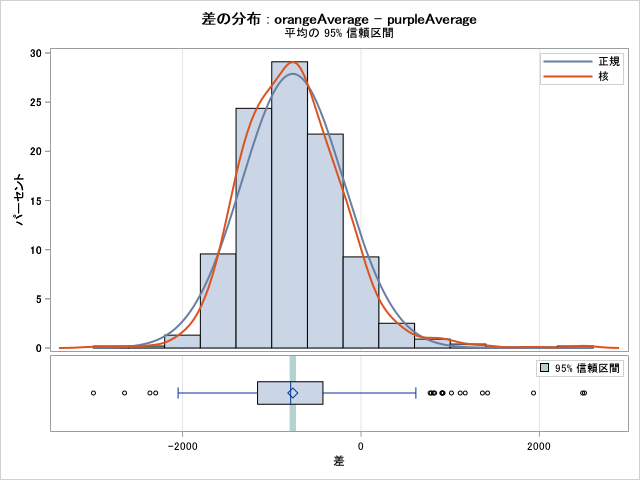
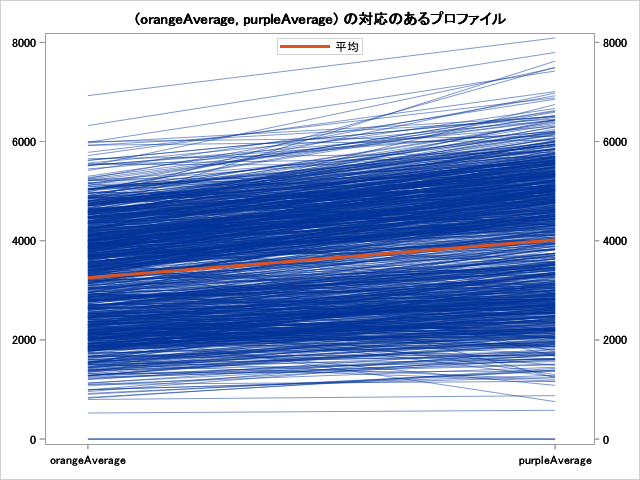
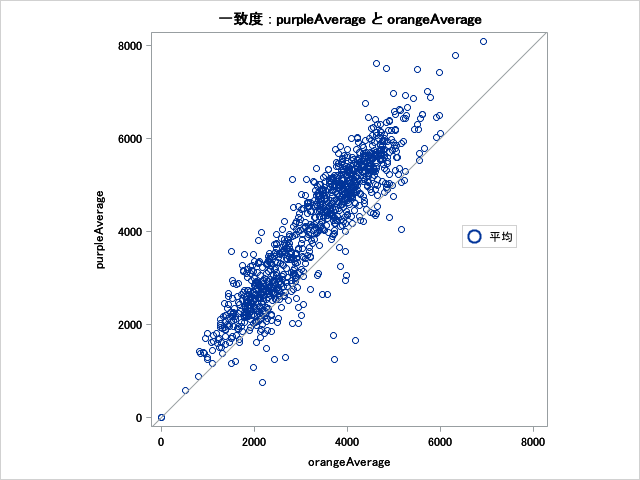
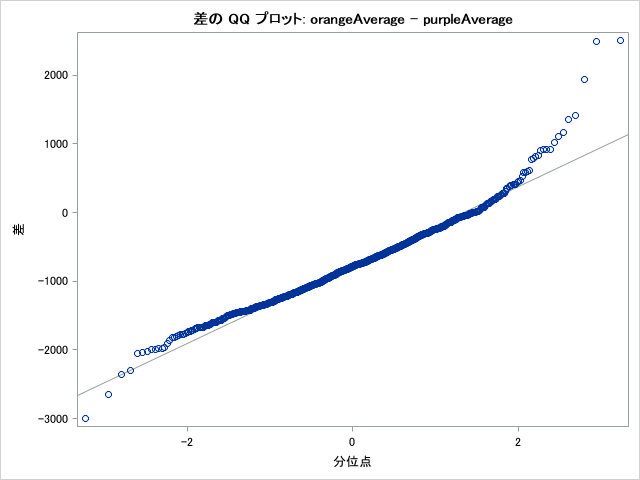

In [12]:
proc ttest data = circ;
  paired orangeAverage*purpleAverage;
run;

## ノンパラメトリック t 検定の代替

サンプルサイズが小さく、データが正規分布に従っていないと仮定できない場合、ノンパラメトリック検定を使用する必要があります。t 検定の代替として、以下の検定が利用できます。

* 一標本 t 検定または対応のある t 検定の代替として、符号検定またはウィルコクソン符号順位検定
* 二標本 t 検定の代替として、ウィルコクソン順位和検定

ウィルコクソン順位和検定を行うには、PROC NPAR1WAY を使用します。

### 例

以下の例では、PROC NPAR1WAY を使用してウィルコクソン順位和検定を行い、オレンジとパープルのバス路線の乗客数の中央値を比較します。

<!-- 
## Nonparametric Alternatives to the T-Tests

In the case that we have a small sample size and the data cannot be assumed to be from populations that are Normally distributed, we need to use a nonparametric test. For the t-tests we have the following possible alternative tests:

* The sign test or the Wilcoxon signed rank test as alternative to the one sample t-test or the paired t-test.
* The Wilcoxon rank sum test as an alternative to the two sample t-test.

To perform a Wilcoxon rank sum test, we use PROC NPAR1WAY.

### Example

In the following example, we use PROC NPAR1WAY to perform Wilcoxon rank sum test to compare median daily ridership counts between the orange and purple bus lines.  
-->


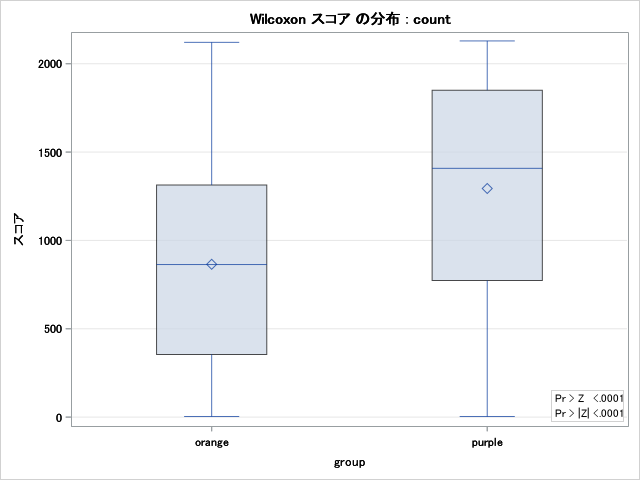

In [13]:
proc npar1way data = circ_sub wilcoxon;
  var count;
  class group;
run;

符号検定またはウィルコクソン符号順位検定を行うには、まず対応のあるペア間の差分を計算し、その差分を PROC UNIVARIATE に渡す必要があります。

### 例

以下のプログラムは、PROC UNIVARIATE を使用して、オレンジとパープルのバス路線の乗客数の差の中央値を検定するための符号検定とウィルコクソン符号順位検定の p 値を算出します。

<!-- 
In order to perform a sign test or Wilcoxon signed rank test, we must first calculate the paired differences between the matched pairs, and then pass the differences to PROC UNIVARIATE.

### Example

The following SAS program performs uses PROC UNIVARIATE to obtain the sign test and Wilcoxon signed rank test p-values for testing for a median difference in ridership counts between the orange and purple bus lines.  
-->

In [14]:
data circ_diff;
  set circ;
  diff = orangeAverage - purpleAverage;
run;

proc univariate data = circ_diff;
  var diff;
run;

PROC UNIVARIATE はデフォルトで多くの出力をします。符号検定と符号順位検定のp値は位置母数検定表で見つけることができます。

<!-- 
PROC UNIVARIATE provides lots of default output. The p-values for the sign test and signed rank test can be found in the test for location table.  
-->

##  一元配置分散分析 (ANOVA) とクラスカル-ウォリス検定

2 つを超える独立なグループ間の平均値を比較したい場合は、分散分析 (ANOVA) またはサンプルサイズが少ない場合はクラスカル-ウォリス検定を行うことができます。SASでの一元配置分散分析は、PROC GLM を使用して実行できます。

### 例

以下のプログラムは、オレンジ、パープル、グリーンの 3 つのバス路線間の乗客数の平均値が等しいことを検定するために、一元配置分散分析を行います。

<!-- 
## One-way ANOVA and the Kruskal-Wallis Test

When we wish to compare means between more than two independent groups, we can perform a one-way ANOVA or in the small sample case a Kruskal-Wallis test. A on-way ANOVA can be performed in SAS by using PROC GLM.

### Example

The following SAS program performs a one-way ANOVA to test for equality of mean ridership counts between the orange, purple, and green bus lines.  
-->


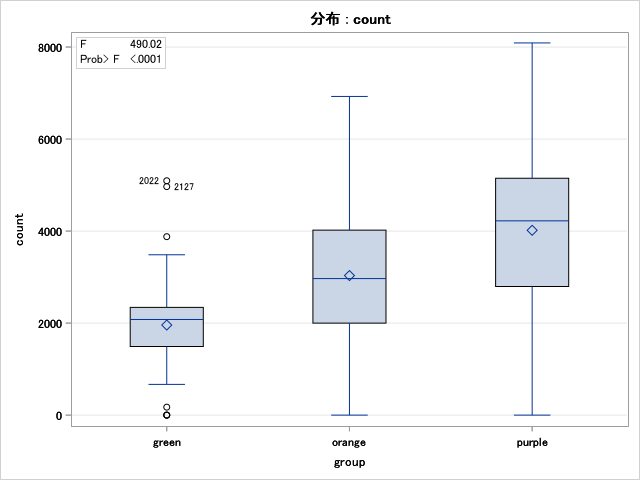

In [15]:
data circ_aov;
  set circ;
  count = orangeaverage;
  group = "orange";
  output;
  count = purpleaverage;
  group = "purple";
  output;
  count = greenaverage;
  group = "green";
  output;
  keep count group;
run;

proc glm data = circ_aov;
  class group;
  model count = group;
run;

代わりにクラスカル-ウォリス検定を行う場合は、PROC NPAR1WAY を使用します。

<!-- 
If instead we wanted to perform a Kruskal-Wallis test, we would use PROC NPAR1WAY.  
-->


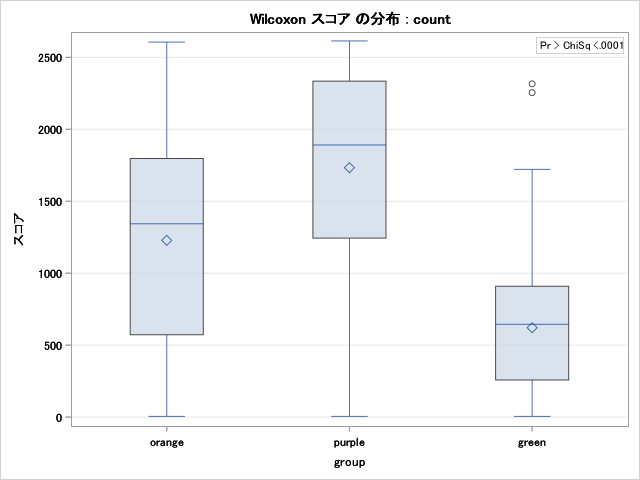

In [16]:
proc npar1way data = circ_aov wilcoxon;
  class group;
  var count;
run;

## 線形回帰

線形回帰モデルを使用するには 2 つのプロシージャを使用できます。

* PROC REG
* PROC GLM

PROC REG は標準出力の大部分を生成しますが、MODELステートメントでは相互作用項などすべての変数を事前にデータステップで準備する必要があります。一方PROC GLM は、MODEL ステートメント内で相互作用項を計算できます。一般的に、PROC GLM を好まれますが、どちらのプロシージャでも標準的な回帰出力を得ることができます。

PROC REG を PROC GLM よりも好まないもう一つの理由は、PROC REG には CLASS ステートメントがないため、PROC REG を使用するときは、カテゴリ変数を0/1にするダミー変数化をデータステップで手動で行う必要があるからです。

以下に、両方のプロシージャを使用したいくつかの例を示します。


### 例

最初の例では、単一の２値の予測変数を持つ単純な線形回帰モデルを使用します。この場合、傾きに関する t 検定は二標本 t 検定と同等であることに注意してください。

<!-- 
## Linear Regression

In SAS, there are two procedures that can be used to fit a linear regression model:

* PROC REG
* PROc GLM

PROC REG will give you most of the standard output, but the model statement requires all variables to be calculated in a prior DATA step, such as interaction terms. PROC GLM, however, allows you to calculate interaction terms on the fly in the MODEL statement. Generally, I prefer PROC GLM for this reason, but either PROC will work and can be used to get all the standard regression output.

Another reason I prefer PROC GLM over PROC REG is that PROC REG does not have a CLASS statement, so you must do all the dummy coding for categorical variables manually in a DATA step when using PROC REG.

Let's look at a few examples using both PROCs.

### Example

The first example fits a simple linear regression model with a single binary predictor. Note that in this case, the t-test for the slope is equivalent to a two sample t-test.  
-->


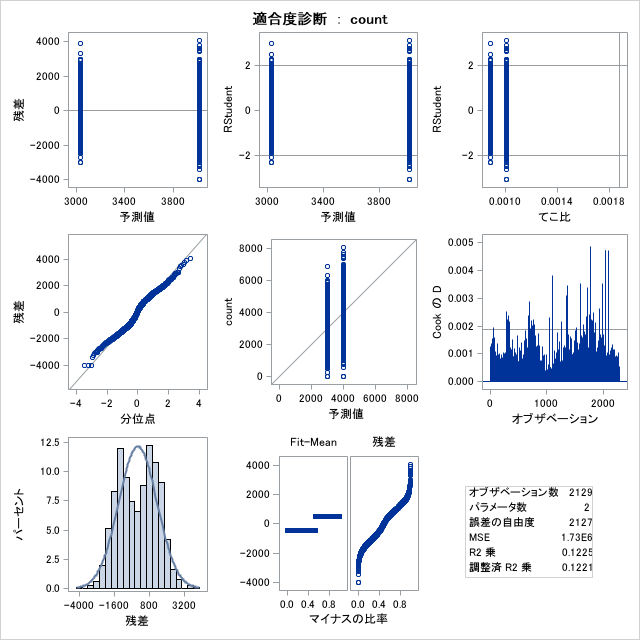
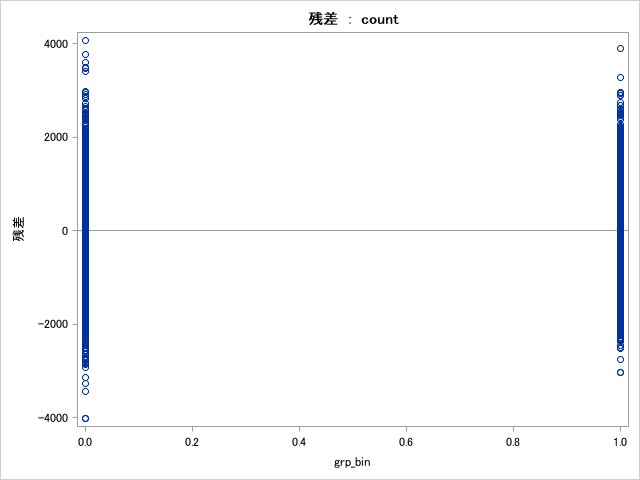
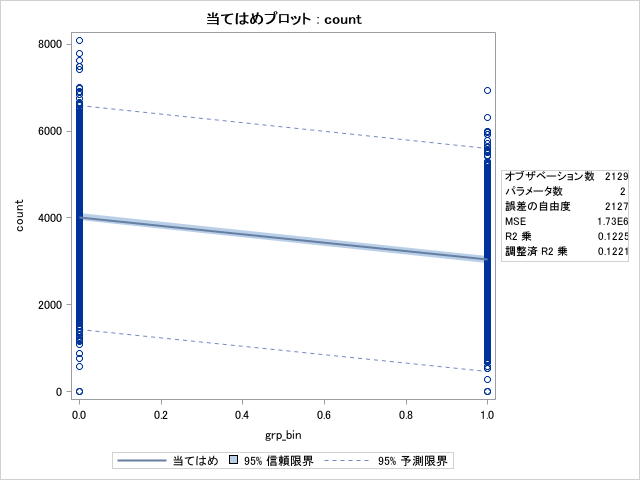

In [17]:
data circ_sub;
  set circ_sub;
  if group = "orange" then grp_bin = 1;
  else grp_bin = 0;
run;

proc reg data = circ_sub;
  model count = grp_bin;
run;


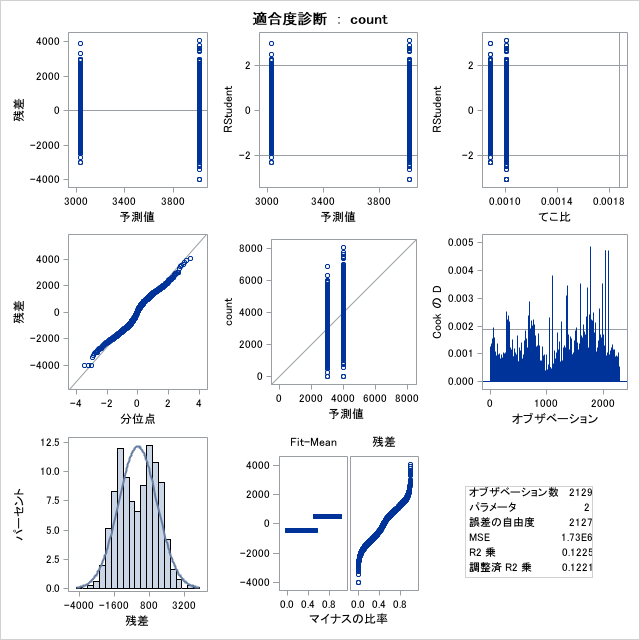
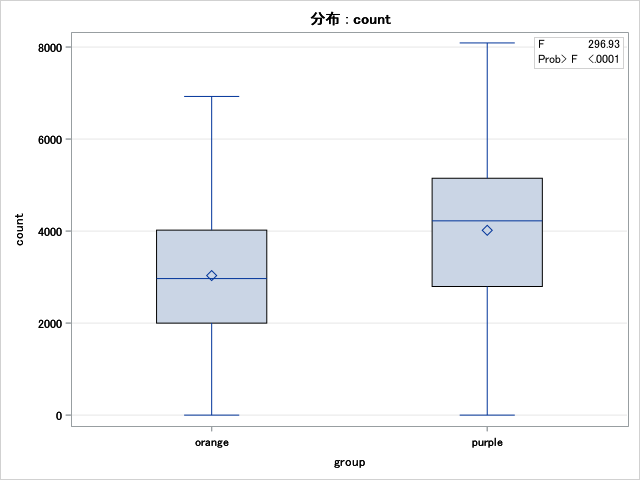

In [18]:
proc glm data = circ_sub plots=diagnostics;
  class group(ref = 'purple');
  model count = group / solution;
run;

両方のプロシージャから同じ出力を得られることがわかりますが、PROC REG ではグループ変数を手動で 0/1 のダミー変数としてコード化する必要がありました。一方、PROC GLM では、CLASS ステートメントと ref= ステートメントを使用して参照カテゴリを選択できました。また、PROC GLM では、残差診断プロットはデフォルト出力ではないため、指定する必要があります。

<!-- 
Note that we get the same output from both procedures, but with PROC REG we had to manually code the group variable as a 0/1 dummy variable, whereas in PROC GLM we could use the CLASS statement with a ref= statement to select the reference category. We also need to request the residual diagnostic plots in PROC GLM as this is not default output.  
-->

PROC GLM と PROC REG の両方から同じ出力を得る方法を確認したので、以降の例では PROC GLM を使用して、ダミー変数と相互作用項を計算するためのデータステップは使用しません。

### 例

以下のプログラムでは、Kaggle の中古車オークションデータセットを使用して、複数の予測変数を持つ線形回帰モデルを使用します。まず、単純な線形回帰モデルを使用し、変数を追加していきます。

<!-- 
Now that we have seen how to get the same output from both PROC GLM and PROC REG, we will use PROC GLM for all the remaining examples to avoid needing to use a DATA step to calculate dummy variables and interaction terms.

### Example

In the following SAS program, we will fit linear regression models with more than one predictor using the Kaggle car auction dataset. First, let's fit a simple linear regression model and build on to it by adding more variables.  
-->

In [19]:
proc glm data = cars;
  model vehodo = vehicleage;
run;

次に、別の変数「IsBadBuy」を追加します。この変数は既に 0/1 のダミー変数であるため、クラス ステートメントに入れる必要はありません (ただし、一致する参照カテゴリを選択すれば、CLASS ステートメントに指定しても出力を得ることができます)。
<!-- 
Now let's add another varialbe, in this case, the binary variable IsBadBuy. This variable is alread a 0/1 dummy variable, so we don't need to put it in a class statement (but we could if we wanted to and still get the same output by choosing the matching reference category).  
-->

In [20]:
proc glm data = cars;
  model VehOdo = VehicleAge IsBadBuy;
run;

MODEL ステートメントで複数の予測変数を追加する場合、 + 記号ではなくスペースで区切ります。相互作用項を追加するには、掛け算を使用して個々の相互作用項を作成して主効果も含めるか、または省略記号 | を使用して主効果と相互作用項を一度にすべて指定することができます。
<!-- 
Note that when adding multiple predictors in the MODEL statement, they are separated by a space instead of a + symbol. To add an interaction, we can create the individual interaction term using * for multiplication while still including the main effect terms or we can use the shorthand | to create all three at the same time.  
-->

In [21]:
proc glm data = cars;
  model VehOdo = VehicleAge IsBadBuy VehicleAge*IsBadBuy;
  *MODEL VehOdo = VehicleAge|IsBadBuy;
run;

残差と予測値を算出するには、OUTPUT ステートメントを使用します。新しいデータに行を追加して応答変数を欠損値に設定することでも、新しい予測値を算出できます。

### 例

以下の例ではOUTPUT ステートメントを使用し残差と予測値を算出します。また予測値を算出するためを新しい列をデータセットに追加します。

<!-- 
To get the residuals and predicted values, use the OUTPUT statement. We can even get predicted values for new data by adding rows to the dataset and setting the response variable to missing.

### Example

In the following example, we will extract the residuals and the predicted values using the OUTPUT statement. We will also add an additional new point to the dataset to get a new predicted value.  
-->

OBS,IsBadBuy,VehicleAge,VehOdo,resid,fitted
72984,1,6,.,.,77549.27
72985,0,5,.,.,73543.88

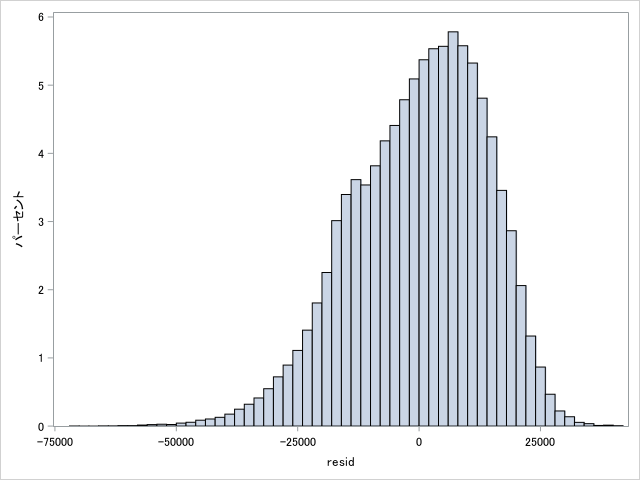

In [22]:
data new;
  input VehOdo VehicleAge IsBadBuy;
  datalines;
. 6 1
. 5 0
;
RUN;

data cars_new;
  set cars(keep = VehOdo VehicleAge IsBadBuy) 
      new;
run;

proc glm data = cars_new noprint;
  model VehOdo = VehicleAge IsBadBuy VehicleAge*IsBadBuy;
  output out=res_pred residuals = resid predicted = fitted;
run;

proc sgplot data = res_pred;
  histogram resid;
run;

proc print data = res_pred (firstobs=72984);
run;

追加のオブザベーションにおける応答変数「VehOdo」の欠損値は、これらの行をモデルに使用できなくなりますが、モデル内の全ての予測変数に値があるため、OUTPUTデータセットでは予測値が計算されます。予測値は、予測変数の値を使用した回帰式に代入することで求められることを思い出してください。例として、追加データの最初のオブザベーションの場合は次のようになります:  
$$\widehat{y}=60139.7 + 1347.28 + 2680.84*6 -3.79*6=77549.28$$  

<!-- 
The missing values for the response, VehOdo, in the new observations keep these rows from being used to fit the model, but since we have values for all the predictors in the model a predicted value is still calculated in the OUTPUT dataset. Recall, the predicted values are found by plugging in the predictor values into the fitted regression equation. For example, for the first new data value:  
$$\widehat{y}=60139.7 + 1347.28 + 2680.84*6 -3.79*6=77549.28$$   
-->

## ロジスティック回帰

一般化線形モデル (GLM) は、連続/正規でない従属変数の回帰分析を行うことができます。glm の構文は、lm コマンドに似ています。ロジスティック回帰はその一例です。

(単純な) ロジスティック回帰モデルでは、0/1の応答変数 Y と予測変数 x を持ちます。予測変数 x が与えられたとき、$Y\sim\text{Bernoulli(p(x))}$、ここで $p(x)=P(Y=1|x)$ であり、

$$\log\left(\dfrac{P(Y=1|x)}{1-P(Y=1|x)}\right)=\beta_0+\beta_1x$$

となります。つまり、成功の対数オッズが x に従って線形に変化するということです。したがって、$e^{\beta_1}$ は、x が 1 単位増加したときの成功のオッズ比であることがわかります。

SAS では、ロジスティック回帰モデルに 2 つのプロシージャを使用できます。

* PROC LOGISTIC
* PROC GENMOD

一般的には、PROC LOGISTIC を使用します。PROC LOGISTIC はロジスティック回帰専用のプロシージャであり、PROC GENMOD にはない多くの機能を提供するからです。


<!-- ## Logistic Regression

Generalized Linear Models (GLMs) allow for fitting regressions for non-continuous/normal outcomes. The glm has similar syntax to the lm command. Logistic regression is one example.

In a (simple) logistic regression model, we have a binary response Y and a predictor x. It is assumed that given the predictor, $Y\sim\text{Bernoulli(p(x))}$ where $p(x)=P(Y=1|x)$ and

$$\log\left(\dfrac{P(Y=1|x)}{1-P(Y=1|x)}\right)=\beta_0+\beta_1x$$

That is the log-odds of success changes linearly with x. It then follows that $e^{\beta_1}$ is the odds ratio of success for a one unit increase in x.

In SAS, there are two procedures that can be used to fit a logistic regression model

* PROC LOGISTIC
* PROC GENMOD

Generally, I use PROC LOGISTIC as it is made specifically for logistic regression and provides many extras that PROC GENMOD does not.
-->

### 例

以下の例では、PROC LOGISTIC を使用して、「IsBadBuy」 を0/1応答変数、「VehOdo」 と 「VehicleAge」 を予測変数とするロジスティック回帰モデルを使用します。

<!-- 
### Example

The following example uses PROC LOGISTIC to fit a logistic regression model with IsBadBuy as the binary response and VehOdo and VehicleAge as predictors.  
-->


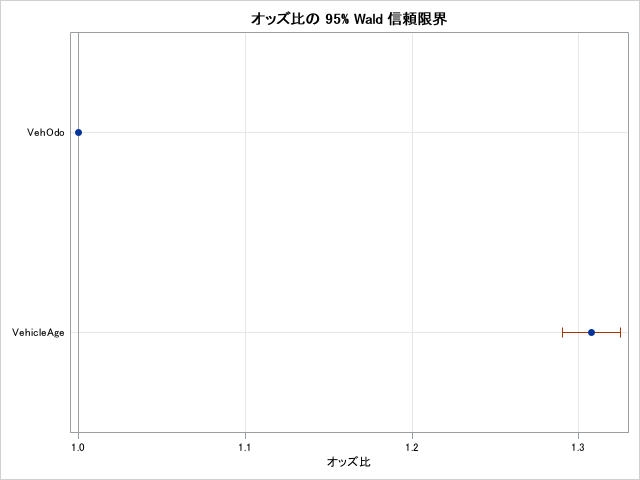

In [23]:
proc logistic data = cars;
  model isbadbuy(event='1') = vehodo vehicleage / clparm=wald clodds=wald;
run;

CLPARM= オプションと CLODDS= オプションは、パラメータ推定値と対応するオッズ比の信頼区間を出力します。

<!-- 
The CLPARM= and CLODDS= options request confidence intervals for the parameter estimates and corresponding odds ratios.  
-->

## ポアソン回帰

ポアソン回帰は、カウントデータに対して用いられます。このモデルは (単一の予測変数の場合は) $Y|x\sim\text{Poisson}(\lambda(x))$、ここで $\lambda(x)=E[Y|x]$ であると仮定し、単一の予測変数の場合は

$$\log(E[Y|x])=\beta_0+\beta_1x.$$

となります。このとき、$e^{\beta_1}$ は、x が 1 単位増加したときの率比を表します。このようなモデルを使用するには、PROC GENMOD を使用します。


### 例

以下のプログラムは、曜日を予測変数として、オレンジのバス路線の乗客数のカウントに対してポアソン回帰モデルを使用します。

<!-- 
## Poisson Regression

Poisson regression is used for count responses. This model assumes that (in the case of a single predictor) that $Y|x\sim\text{Poisson}(\lambda(x))$, where $\lambda(x)=E[Y|x]$, and for the case of a single predictor

$$\log(E[Y|x])=\beta_0+\beta_1x.$$

Then $e^{\beta_1}$ represents the rate ratio for a one unit increase in x. To fit such a model, we will use PROC GENMOD.

### Example

The following SAS program fits a Poisson regression model to the count response of the daily ridership count on the orange bus line with day of the week as the predictor.  
-->

In [24]:
proc genmod data = circ;
  class day(ref='Friday');
  model orangeBoardings = day / dist = Poisson link = log;
run;

model ステートメントでは、dist=Poisson オプションを指定して、応答変数がポアソン分布に従うと仮定し、link=log オプションで log リンクを使用することを指定します。  
ポアソン回帰モデルでオフセットを使用したい場合は、model ステートメントで OFFSET= オプションを使用できます。ただし、このオプションを使用する場合は、オフセット値の対数 (log()) を自分で設定する必要があります。

<!-- 
In the model statement, we need to specify the dist=Poisson option to specify that the response is assumed to be Poisson and that we are using the log link via the link=log option.  
In the case that an offset is desired in a Poisson regression model, we can use the OFFSET= option in the model statement. Note that when using this option, we must take the log() of the offset value ourselves.  
-->

## 演習

これらの演習では、乳児死亡率データセット (indicatordeadkids35.csv) と Kaggle 中古車オークションデータセット (kaggleCarAuction.csv) を使用します。以下のコードを修正して、このデータセットを読み込んでください。

<!-- 
## Exercises

These exercises will use the child mortality dataset, indicatordeadkids35.csv, and the Kaggle car auction dataset, kaggleCarAuction.csv. Modify the following code to read in this dataset.
-->

In [ ]:
filename cardata '/folders/myfolders/SAS_Notes/data/kaggleCarAuction.csv';

proc import datafile = cardata out = cars dbms = csv replace;
  getnames = yes;
  guessingrows = 1000;
run;

filename mortdat '/folders/myfolders/SAS_Notes/data/indicatordeadkids35.csv';

proc import datafile = mortdat out = mort dbms = csv replace;
  getnames = yes;
  guessingrows = 500;
run;

1. 1980年、1990年、2000年、2010年の死亡率データ間の相関関係を計算します。結果を画面に表示するだけで十分です。次に、NOMMISS オプションを使用して計算します。(注意: 列名は数値ですが、SASの標準的な名前としては無効なので、コード内で 1980 年の変数を指すには '1980'n を使用します)
2. 
   a. ミャンマー、中国、およびアメリカの死亡率データ間の相関関係を計算します。この相関行列をODS OUTPUT を使用してデータセット country_corに出力します。  
   b. ミャンマーとアメリカの相関関係を相関行列から抽出します。  

3. 1990年と2000年の死亡率情報間に差があるかどうかを、対応のある t 検定とウィルコクソン符号順位検定で調べてください。ヒント: 1990年の情報列を取り出すには '1990'n を使用します。
4. データセット carsを使用して、車両価格「VehBCost」 を従属変数とし、車両年齢「VehicleAge」とオンライン販売 「IsOnlineSale」の有無とその相互作用を予測変数とする線形回帰モデルを使用します。
5. データセットcars内に車両価格が 10,000 ドルを超えていることを示す変数「expensive」を作成してください。カイ二乗検定により車が高価だったことと、損な取引だったことを示すラベル用変数「IsBadbuy」に関連があるかを評価してください。
6. ロジスティック回帰を使用し、 応答変数を「IsBadbuy」予測変数を「expensive」「VehicleAge」としてオッズ比の信頼区間を算出してください。

<!-- 
1. Compute the correlation between the `1980`, `1990`, `2000`, and `2010` mortality data. Just display the result to the screen. Then compute using the NOMMISS option. (Note: The column names are numbers, which are invalid standard SAS names, so to refer to the variable 1980 in your code use '1980'n.)
2. 
   a. Compute the correlation between the `Myanmar`, `China`, and `United States` mortality data. Store this correlation matrix in an object called `country_cor` using ODS OUTPUT.
   b. Extract the Myanmar-US correlation from the correlation matrix.
3. Is there a difference between mortality information from `1990` and `2000`? Run a paired t-test and a Wilcoxon signed rank test to assess this. Hint: to extract the column of information for `1990`, use '1990'n.
4. Using the cars dataset, fit a linear regression model with vehicle cost (`VehBCost`) as the outcome and vehicle age (`VehicleAge`) and whether it's an online sale (`IsOnlineSale`) as predictors as well as their interaction.
5. Create a variable called `expensive` in the `cars` data that indicates if the 
vehicle cost is over `$10,000`. Use a chi-squared test to assess if there is a
relationship between a car being expensive and it being labeled as a "bad buy" (`IsBadBuy`).
6. Fit a logistic regression model where the outcome is "bad buy" status and predictors are the `expensive` status and vehicle age (`VehicleAge`). Request confidence intervals for the odds ratios.
-->